<a href="https://www.kaggle.com/code/blessingumoru/playground-s3e12-using-esemble-learning?scriptVersionId=124729638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
train_data= pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test_data= pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
#original_data= pd.read_csv('/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv')
inputdata = train_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
ttdata =test_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]

In [3]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4),

(None, None)

In [4]:
train_data.isna().sum(), test_data.isna().sum()

(id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 target     0
 dtype: int64,
 id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 dtype: int64)

In [5]:
train_data.duplicated().sum(),test_data.duplicated().sum()

(0, 0)

# Definition of Features

**id**-identification
>**target** - Probability it is a kidney stone 

**gravity(normal -1.002 to 1.030)**- 
>Urine gravity refers to the concentration of particles in the urine, specifically the amount of dissolved solids, such as salts and minerals.higher urine gravity values can indicate dehydration or the presence of certain medical conditions that increase the risk of developing kidney stones.

**ph (normal - 4.5 to 8.0 where 7.0 is neutral)**- 
>High urine pH levels can increase the risk of struvite or calcium phosphate stones, while low urine pH levels can increase the risk of uric acid stones.

**osmo(normal 50 to 1400 milliosmoles per kilogram (mOsm/kg).)** -
>High urine osmolality can increase the risk of certain types of kidney stones, including calcium oxalate and calcium phosphate stones.

**cond (the normal range for urine conductivity is between 50 and 1,500 microsiemens per centimeter (μS/cm))** 
>Urine conductivity is a measure of the ability of urine to conduct an electrical current, and it is influenced by the concentration of dissolved ions in the urine, including calcium, sodium, potassium, and magnesium.

**urea**
> A waste product of protein metabolism that is excreted by the kidneys.

**calc (concentration of calcium in urine -(between 100 and 300 mg/dL or 2.5 and 7.5 mmol/L.))**
> Calcium concentration refers to the amount of calcium ions (Ca2+) present in a given volume of urine or other biological fluid.

**create a new feature**
* osomlarity is directly proportional to gravity
* The higher the PH the higher the the concentration of calcium**directly propotional**
* The lower the PH the higher the urea(uric acid)**inversely propotional**
* no of particle per calcium = osomlarity/(conc of calcium *vant hoff factor)
* no of particle per urea = osomlarity/(urea *vant hoff factor)

# Feature Engineering

In [6]:
"""train_data['Osmo_gravity'] = train_data['osmo']/train_data['gravity']
train_data['PH_calc'] = train_data['ph']/train_data['calc']
train_data['PH_urea'] = train_data['ph']*train_data['urea']
train_data['particle_calc'] = train_data['osmo']/(train_data['calc'])
train_data['particle_urea'] = train_data['osmo']/(train_data['urea'])"""


class UrineAnalysis:
    
    def __init__(self, data):
        self.data = data
    
    def calculate_osmo_gravity(self):
        self.data['Osmo_gravity'] = self.data['osmo'] / self.data['gravity']
        
    def calculate_ph_calc(self):
        self.data['PH_calc'] = self.data['ph'] / self.data['calc']
        
    def calculate_ph_urea(self):
        self.data['PH_urea'] = self.data['ph'] * self.data['urea']
        
    def calculate_particle_calc(self):
        self.data['particle_calc'] = self.data['osmo'] / self.data['calc']
        
    def calculate_particle_urea(self):
        self.data['particle_urea'] = self.data['osmo'] / self.data['urea']

In [7]:
targetVar = train_data.target
inputVariable = train_data.drop(['target','id'],axis=1)

In [8]:
urine_analysis = UrineAnalysis(inputVariable)

# Use the class methods to calculate new variables and add them to the dataset
urine_analysis.calculate_osmo_gravity()
urine_analysis.calculate_ph_calc()
urine_analysis.calculate_ph_urea()
urine_analysis.calculate_particle_calc()
urine_analysis.calculate_particle_urea()

# Display the updated dataset
inputVariable.head()

,gravity,ph,osmo,cond,urea,calc,Osmo_gravity,PH_calc,PH_urea,particle_calc,particle_urea
0,1.013,6.19,443,14.8,124,1.45,437.314906,4.268966,767.56,305.517241,3.572581
1,1.025,5.40,703,23.6,394,4.18,685.853659,1.291866,2127.60,168.181818,1.784264
2,1.009,6.13,371,24.5,159,9.04,367.690783,0.678097,974.67,41.039823,2.333333
3,1.021,4.91,442,20.8,398,6.63,432.908913,0.740573,1954.18,66.666667,1.110553
4,1.021,5.53,874,17.8,385,2.21,856.023506,2.502262,2129.05,395.475113,2.270130


In [9]:
inputVariable.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'Osmo_gravity',
       'PH_calc', 'PH_urea', 'particle_calc', 'particle_urea'],
      dtype='object')

In [10]:
inputVariable.isna().sum()

gravity          0
ph               0
osmo             0
cond             0
urea             0
calc             0
Osmo_gravity     0
PH_calc          0
PH_urea          0
particle_calc    0
particle_urea    0
dtype: int64

In [11]:
inputVariable.duplicated().sum()

0

# EDA

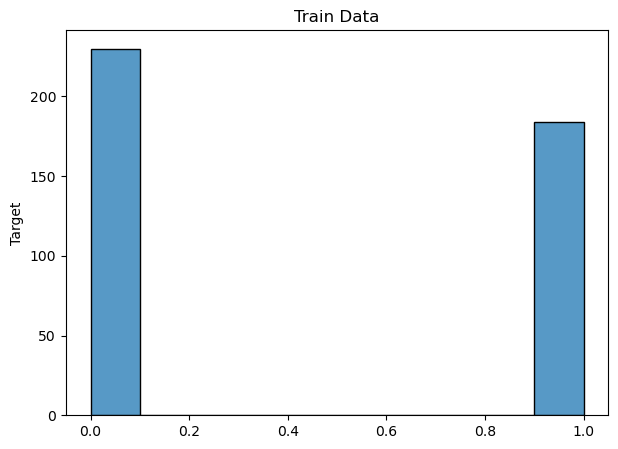

In [12]:
plt.figure(figsize=(7,5))
p = sns.histplot(data=train_data, x="target")
p.set(xlabel = None)
p.set(ylabel = 'Target')
plt.title('Train Data')
plt.show()

#plt.figure(figsize=(7,5))
#p = sns.histplot(data=original_data, x="target")
#p.set(xlabel = None)
#p.set(ylabel = 'Target')
#plt.title('Original Data')
#plt.show()

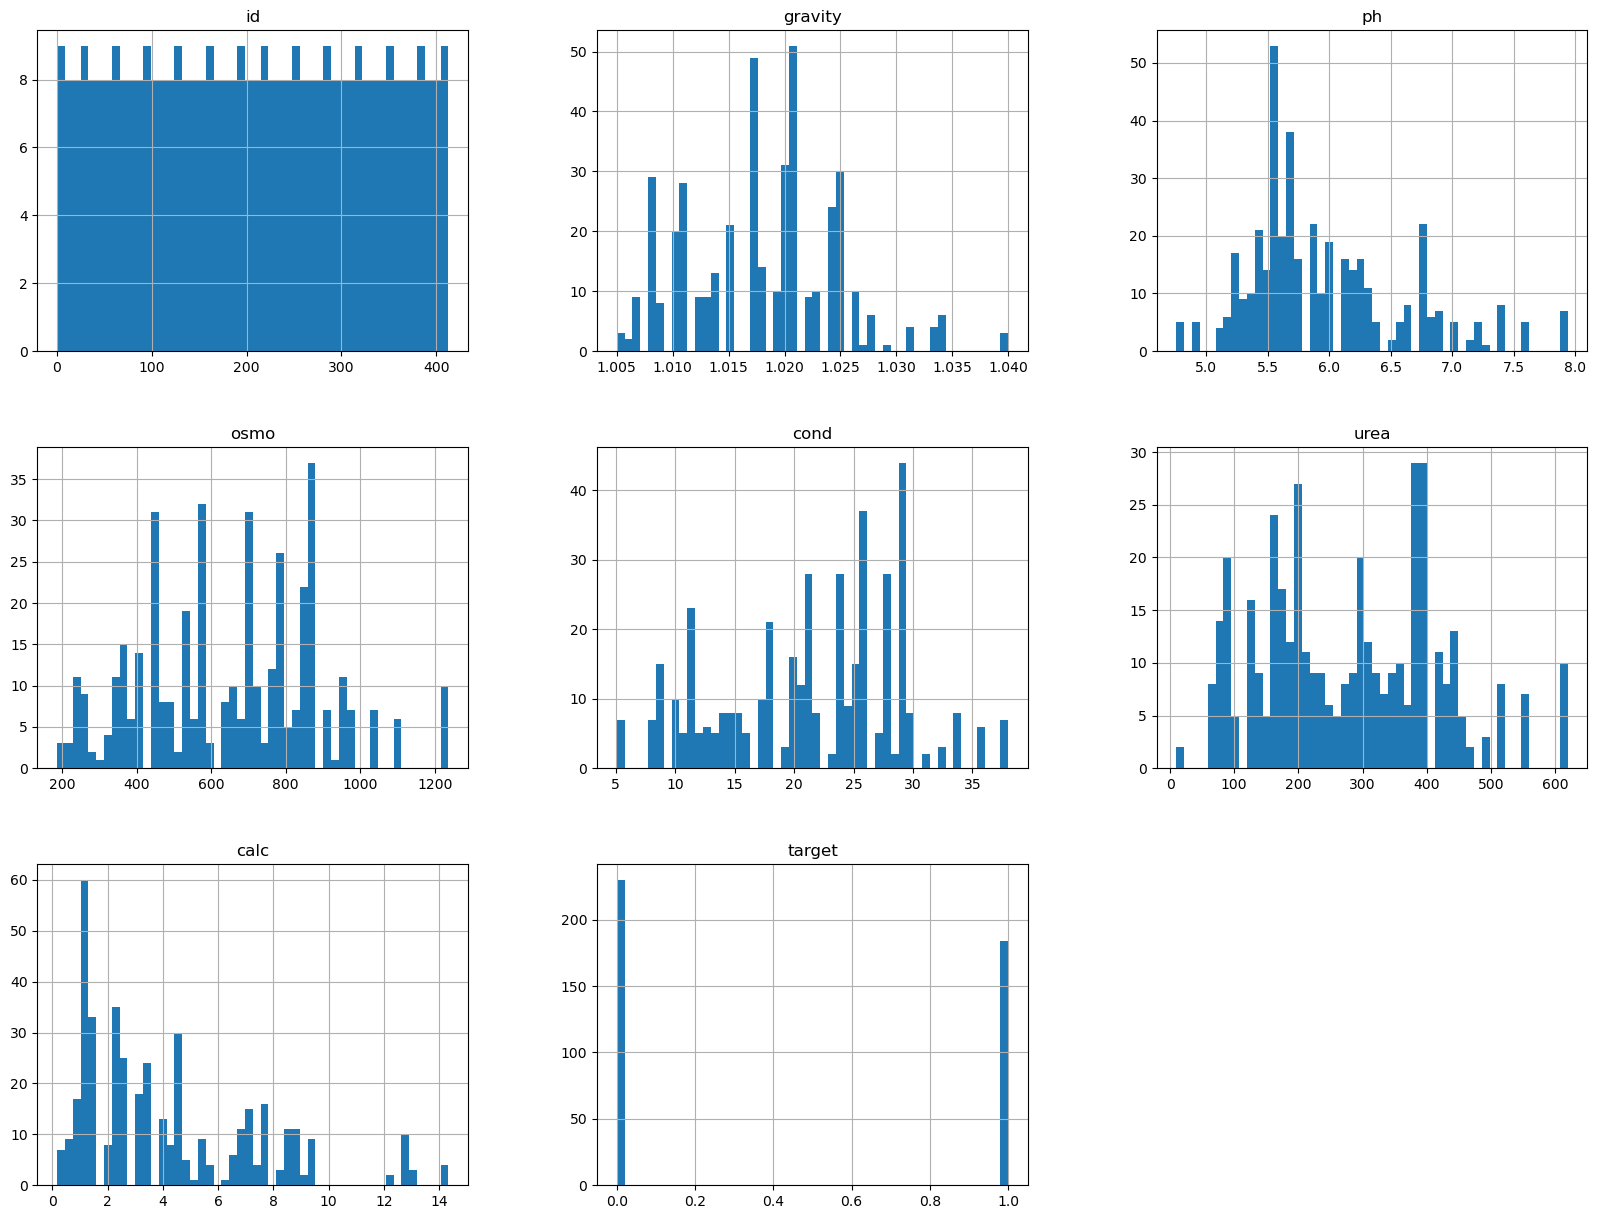

In [13]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

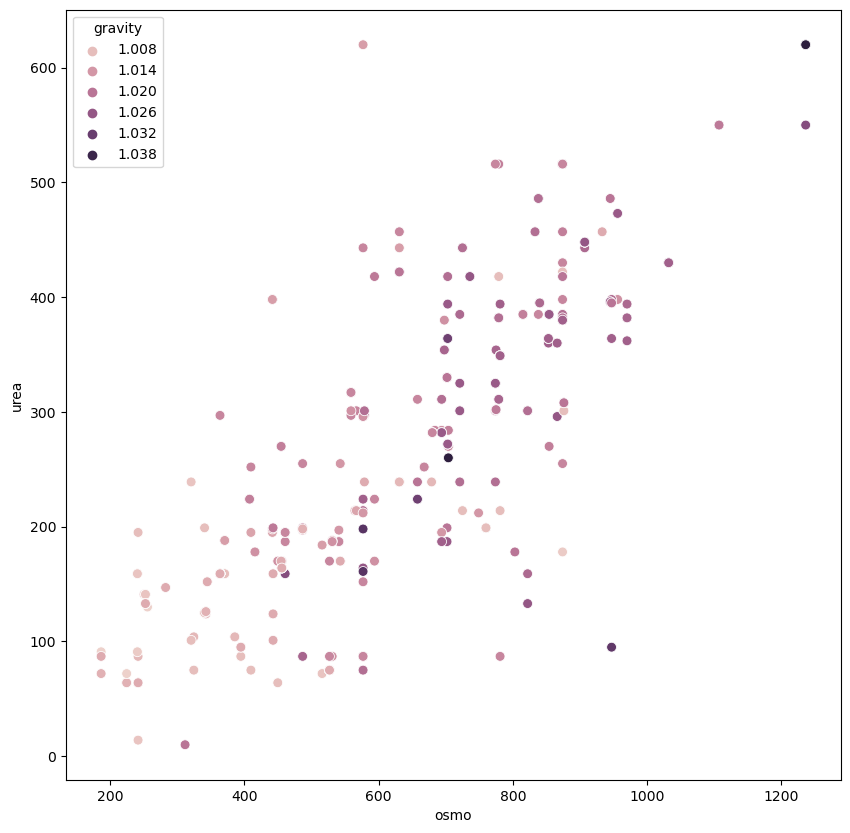

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='osmo', y='urea', hue='gravity',data=train_data,s=50)
plt.show()

In [15]:
train_data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [16]:
inputVariable.describe()

,gravity,ph,osmo,cond,urea,calc,Osmo_gravity,PH_calc,PH_urea,particle_calc,particle_urea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,639.076188,3.159409,1635.074783,292.856321,2.796164
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,227.658735,4.454039,792.299822,417.869909,2.021649
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,184.965381,0.359833,47.600000,28.706625,0.930645
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,447.717555,0.883925,980.995000,113.884171,2.024554
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,668.633235,1.882716,1600.345000,195.100223,2.364103
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,819.113212,4.192340,2168.440000,324.467655,2.780488
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1211.764706,40.058824,4922.800000,4000.000000,31.200000


from the above it shows that there is a need for scaling since the features are not normally distributed.

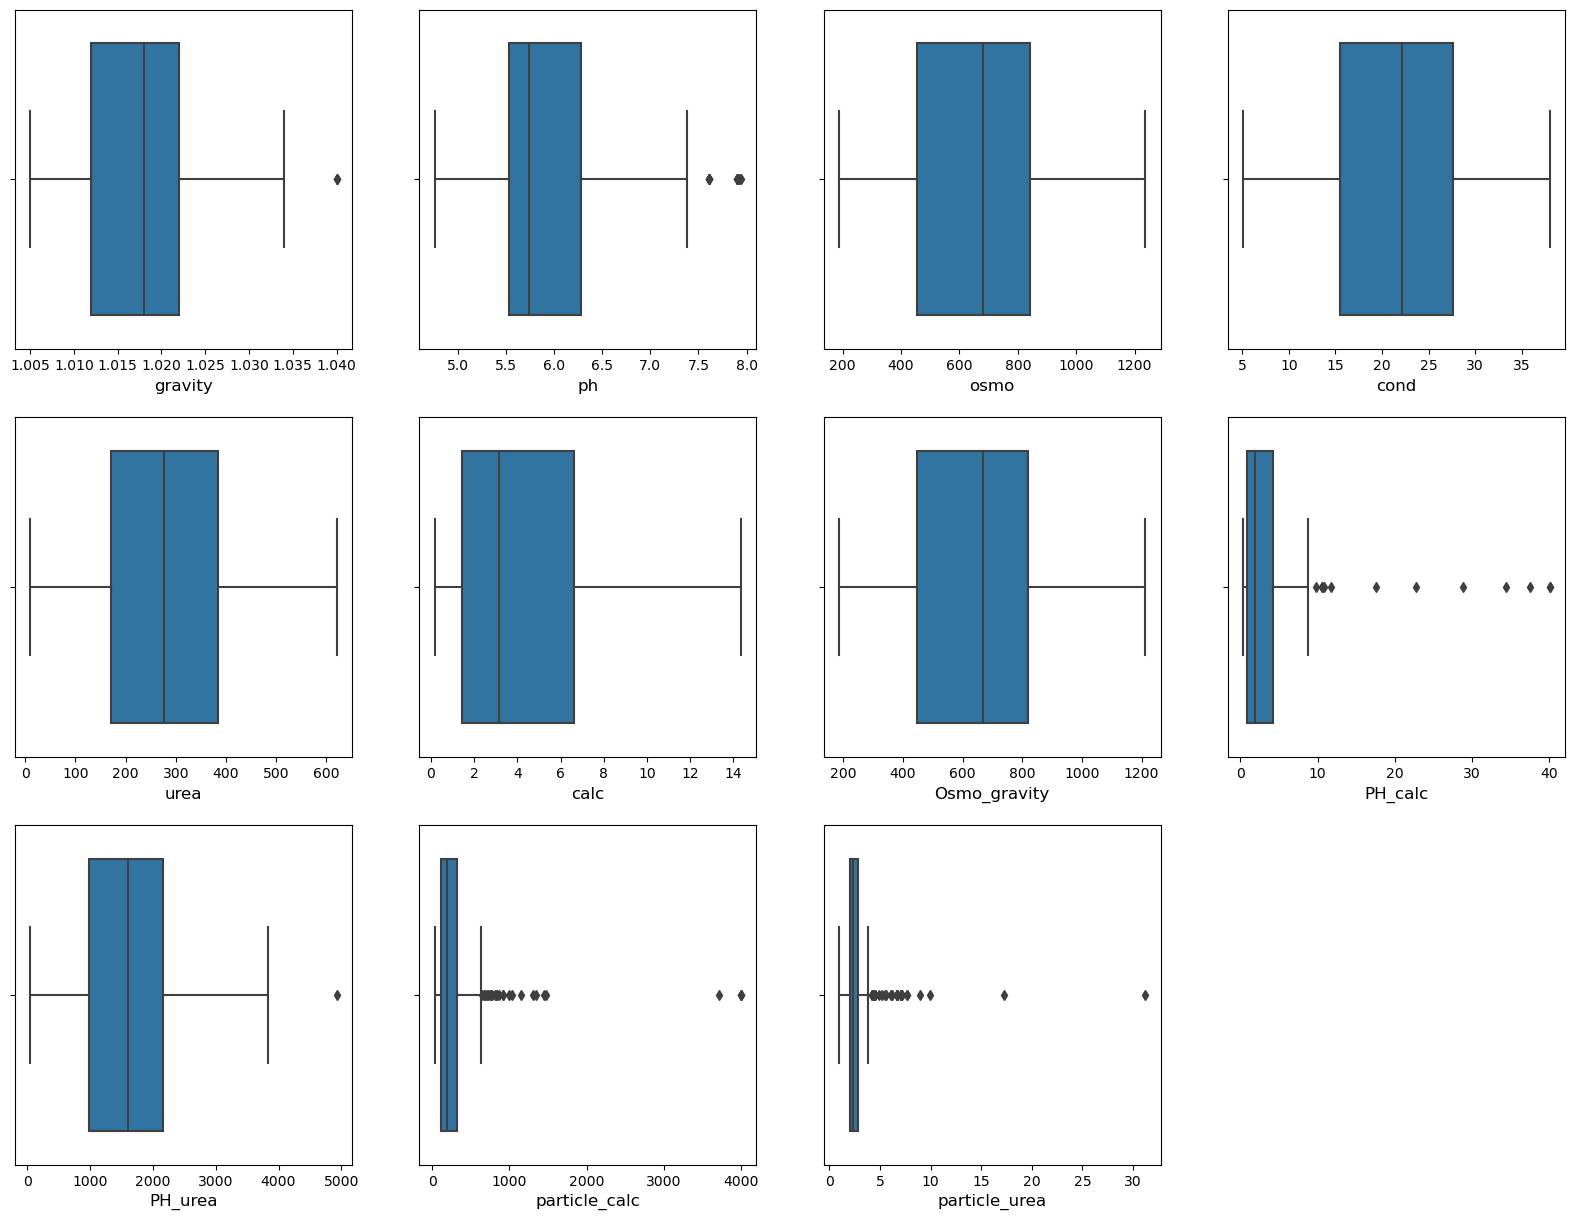

In [17]:
plt.figure(figsize=(20, 15))
for i in range(len(inputVariable.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x =inputVariable.iloc[:, i])
    plt.xlabel(inputVariable.columns[i], size =12)

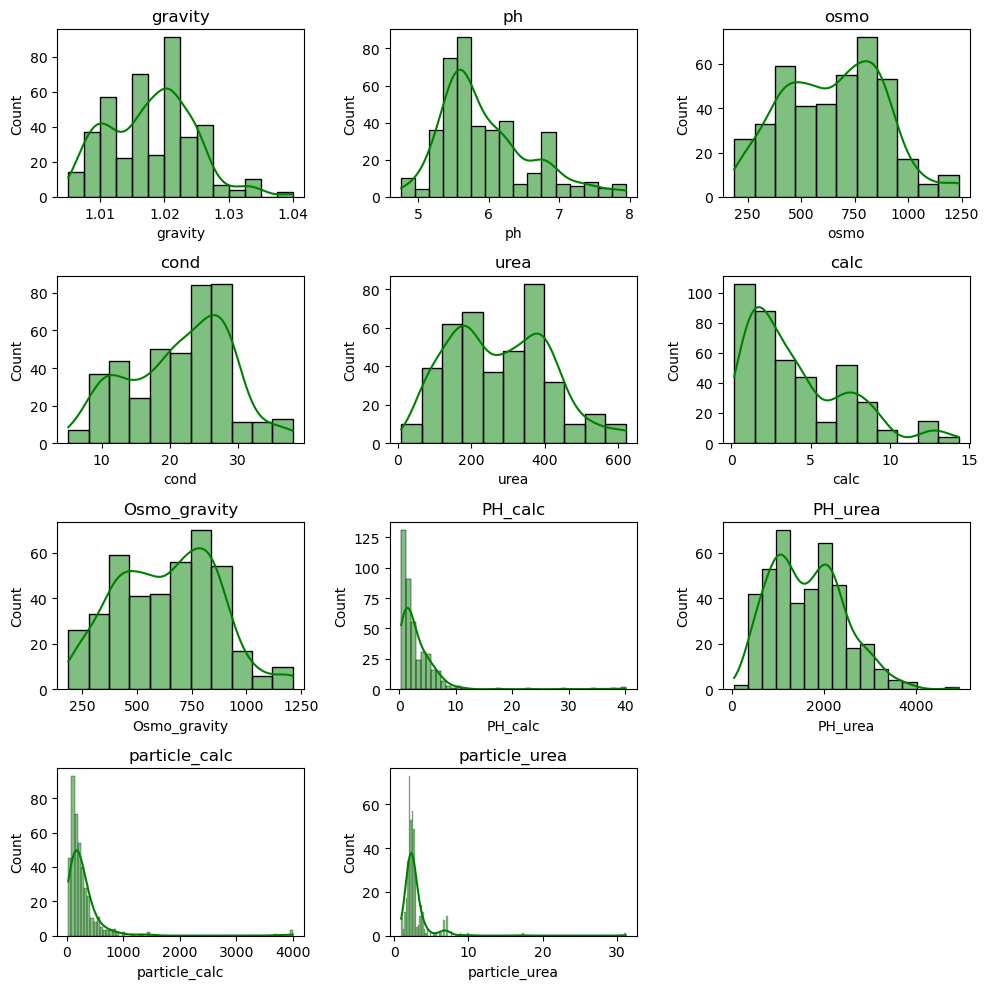

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(inputVariable.columns):
        sns.histplot(inputVariable.iloc[:,i], ax=ax, kde=True, color='green')
        ax.set(title=inputVariable.columns[i])
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

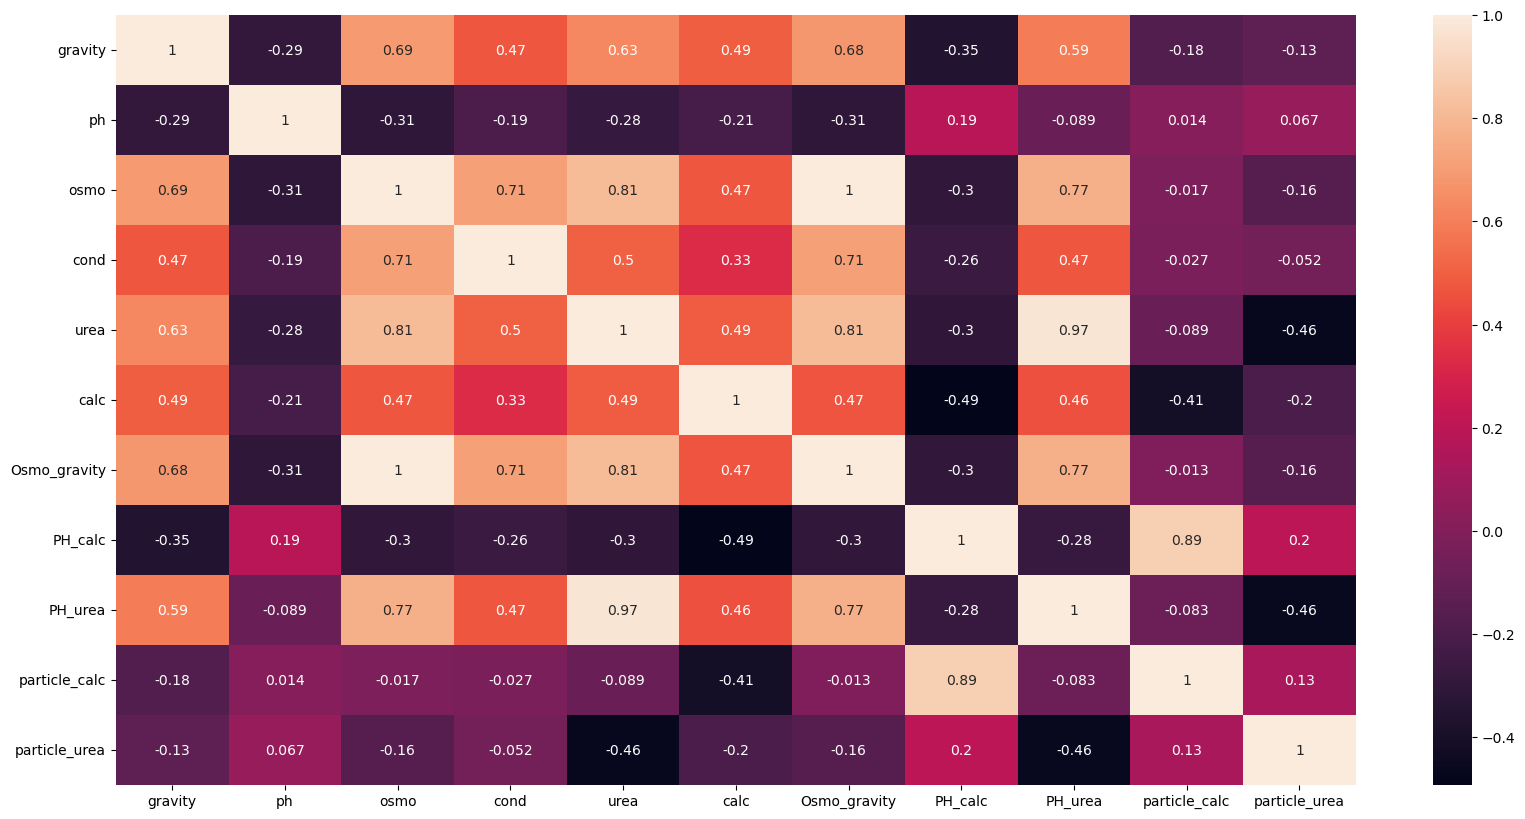

In [19]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(inputVariable.corr(), annot= True)

<AxesSubplot:>

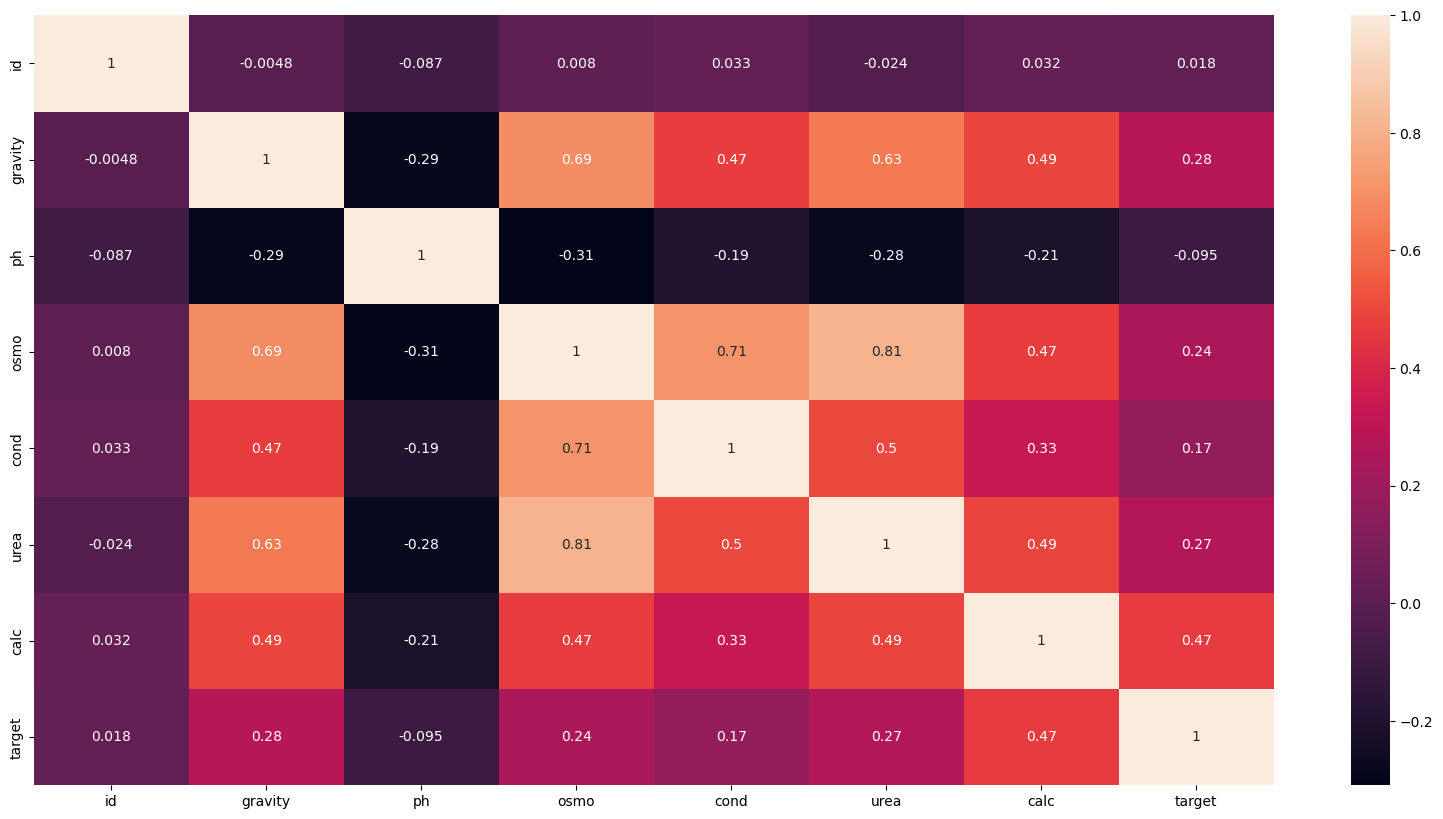

In [20]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(train_data.corr(), annot= True)

<AxesSubplot:>

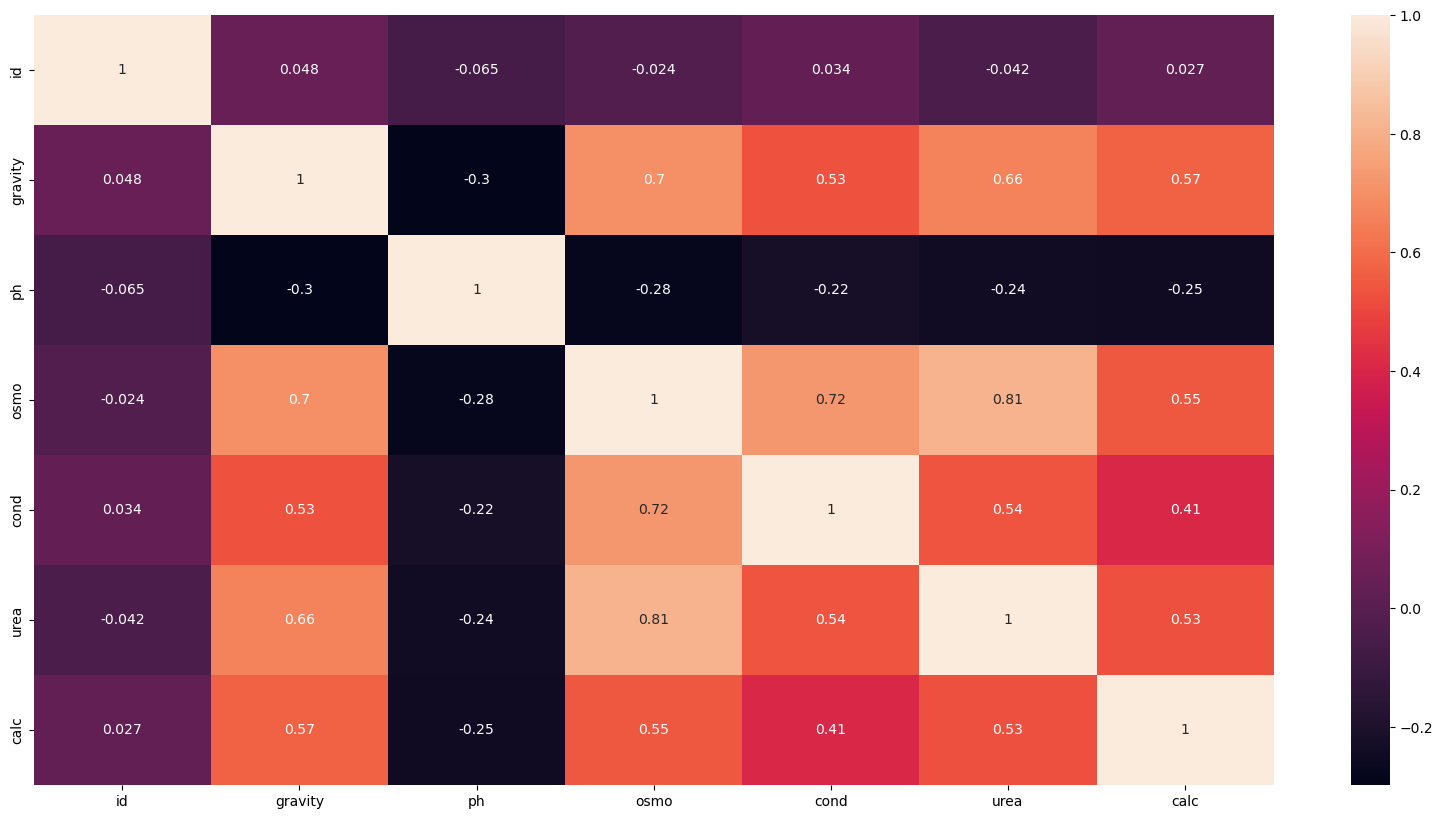

In [21]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(test_data.corr(), annot= True)

In [22]:
#train_data.columns, test_data.columns

In [23]:
#targetVariable= train_data.target
#new_train_data = train_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
#new_test_data = test_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
#new_train_data.head(), new_test_data.head()

In [24]:

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as Rsquared, log_loss
import warnings
warnings.filterwarnings('ignore')
import time

In [25]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputVariable,targetVar,test_size=0.2,random_state=42)

In [26]:
cat_model = CatBoostClassifier(iterations=50,max_depth=4,eta=0.1,
                               random_seed=8,reg_lambda=20,bootstrap_type='Bayesian')
cat_model.fit(Xtrain,Ytrain)
Y_predictn = cat_model.predict_proba(Xtest)
logloss = log_loss(Ytest, Y_predictn)
print(logloss)

0:	learn: 0.6846250	total: 56.8ms	remaining: 2.78s
1:	learn: 0.6751363	total: 57.6ms	remaining: 1.38s
2:	learn: 0.6654451	total: 58.2ms	remaining: 912ms
3:	learn: 0.6584213	total: 58.9ms	remaining: 677ms
4:	learn: 0.6521413	total: 59.5ms	remaining: 536ms
5:	learn: 0.6444987	total: 60.2ms	remaining: 441ms
6:	learn: 0.6384616	total: 60.8ms	remaining: 373ms
7:	learn: 0.6320750	total: 61.4ms	remaining: 322ms
8:	learn: 0.6258314	total: 63ms	remaining: 287ms
9:	learn: 0.6194054	total: 65.9ms	remaining: 264ms
10:	learn: 0.6122751	total: 67.2ms	remaining: 238ms
11:	learn: 0.6051918	total: 68ms	remaining: 215ms
12:	learn: 0.6009665	total: 68.5ms	remaining: 195ms
13:	learn: 0.5975446	total: 69ms	remaining: 177ms
14:	learn: 0.5929158	total: 69.4ms	remaining: 162ms
15:	learn: 0.5894896	total: 70ms	remaining: 149ms
16:	learn: 0.5854222	total: 70.4ms	remaining: 137ms
17:	learn: 0.5809507	total: 70.9ms	remaining: 126ms
18:	learn: 0.5772559	total: 71.4ms	remaining: 117ms
19:	learn: 0.5755098	total: 71

In [27]:
urine_analysis = UrineAnalysis(ttdata)

# Use the class methods to calculate new variables and add them to the dataset
urine_analysis.calculate_osmo_gravity()
urine_analysis.calculate_ph_calc()
urine_analysis.calculate_ph_urea()
urine_analysis.calculate_particle_calc()
urine_analysis.calculate_particle_urea()

# Display the updated dataset
ttdata.head()

,gravity,ph,osmo,cond,urea,calc,Osmo_gravity,PH_calc,PH_urea,particle_calc,particle_urea
0,1.017,5.24,345,11.5,152,1.16,339.233038,4.517241,796.48,297.413793,2.269737
1,1.020,5.68,874,29.0,385,3.46,856.862745,1.641618,2186.80,252.601156,2.270130
2,1.024,5.36,698,19.5,354,13.00,681.640625,0.412308,1897.44,53.692308,1.971751
3,1.020,5.33,668,25.3,252,3.46,654.901961,1.540462,1343.16,193.063584,2.650794
4,1.011,5.87,567,29.0,457,2.36,560.830861,2.487288,2682.59,240.254237,1.240700


In [28]:
testDataPredict=cat_model.predict_proba(ttdata)
prediction = pd.DataFrame({'id': test_data['id'], 'target': testDataPredict[:, 1]})
prediction.to_csv('targetPredicted.csv', index=False)
print("Your submission was successfully saved!")
prediction.head()
                         

Your submission was successfully saved!


,id,target
0,414,0.205627
1,415,0.438237
2,416,0.692431
3,417,0.551334
4,418,0.334312
